## In this notebook, we will analyze the animal-10 dataset from the developer alessiocorrado99

In [10]:
import os
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import random
import shutil

Downloading the dataset, for this we need to have a kaggle token

In [13]:
kaggle.api.dataset_download_files('alessiocorrado99/animals10', path='E:\\Projects\\winstars-test-task\\ml_pipeline_project\\data\\animals_dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10


Translate label names in the dataset into English

In [14]:
translate = {
    "cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly",
    "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep",
    "scoiattolo": "squirrel", "ragno": "spider"
}

DATASET_PATH = "E:/Projects/winstars-test-task/ml_pipeline_project/data/animals_dataset/raw-img"

for old_name, new_name in translate.items():
    old_path = os.path.join(DATASET_PATH, old_name)
    new_path = os.path.join(DATASET_PATH, new_name)

    if os.path.exists(old_path):
        os.rename(old_path, new_path)

classes = os.listdir(DATASET_PATH)

print("Translated classes:")
print(classes)

Translated classes:
['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


Checking the distribution of classes

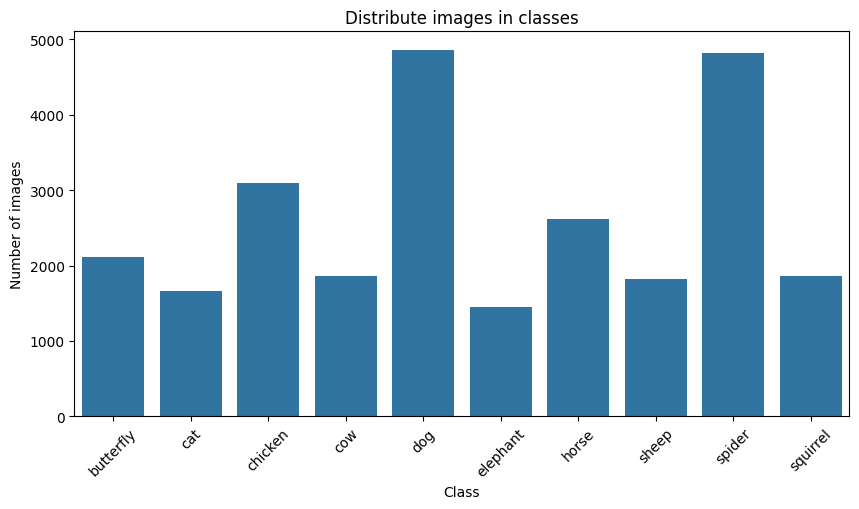

In [15]:
class_counts = {cls: len(os.listdir(os.path.join(DATASET_PATH, cls))) for cls in classes}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Distribute images in classes")
plt.show()

The graph shows that the dataset is unevenly distributed, so we need to use augmentation for classes with fewer images

We can see the average size of images:

Середній розмір: 423.04 x 317.14


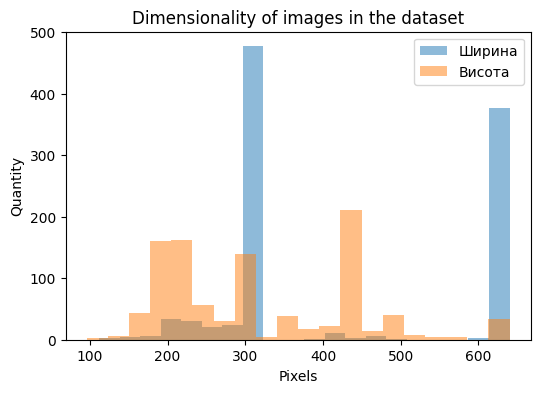

In [16]:
img_sizes = [Image.open(os.path.join(DATASET_PATH, cls, img)).size for cls in classes for img in os.listdir(os.path.join(DATASET_PATH, cls))[:100]]

widths, heights = zip(*img_sizes)
print(f"Mean size: {np.mean(widths):.2f} x {np.mean(heights):.2f}")

plt.figure(figsize=(6, 4))
plt.hist(widths, bins=20, alpha=0.5, label="Width")
plt.hist(heights, bins=20, alpha=0.5, label="Height")
plt.legend()
plt.xlabel("Pixels")
plt.ylabel("Quantity")
plt.title("Dimensionality of images in the dataset")
plt.show()

Visualizing several random images from the dataset to see if they are displayed correctly

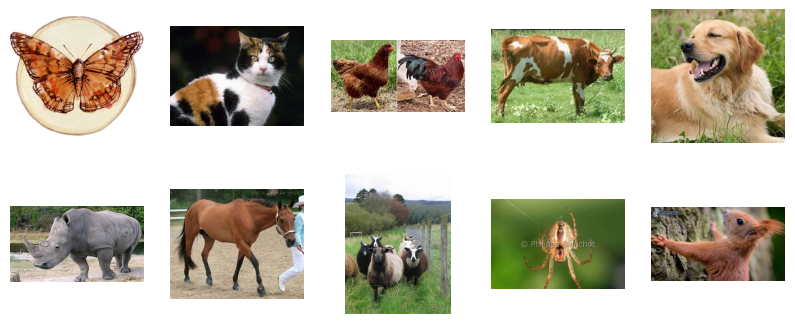

In [24]:
sample_images = []

for class_name in classes:
    class_dir = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_dir):
        image_files = os.listdir(class_dir)
        random_image = random.choice(image_files)
        image_path = os.path.join(class_dir, random_image)
        sample_images.append(image_path)

num_images = len(sample_images)

plt.figure(figsize=(10, 4))

rows = (num_images // 5) + (1 if num_images % 5 != 0 else 0)

for i, image_path in enumerate(sample_images):
    img = Image.open(image_path)
    plt.subplot(rows, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

### By analyzing the dataset, we found out that it was uneven, so it needed to be augmented and divided into a training and a test set